In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:

# Load the data from the Excel file
file_path = 'C:/Users/Rahul/Downloads/AssignmentData.xlsx'
df = pd.read_excel(file_path, sheet_name='creditcard')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.88285,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
284803,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.41317,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
284804,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.65225,...,0.751826,0.834108,0.190944,0.03207,-0.739695,0.471111,0.385107,0.194361,77.89,1
284805,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Exploratory Data Analysis (EDA)

In [5]:
# Display basic information
print(df.info())
print(df.describe())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

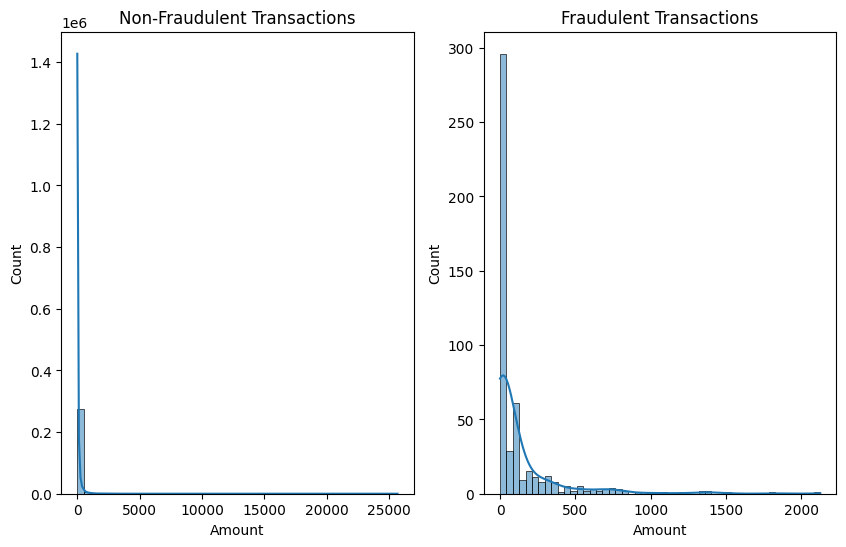

In [6]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))

# Non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True)
plt.title('Non-Fraudulent Transactions')

# Fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True)
plt.title('Fraudulent Transactions')

plt.show()

Feature Engineering

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time'
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

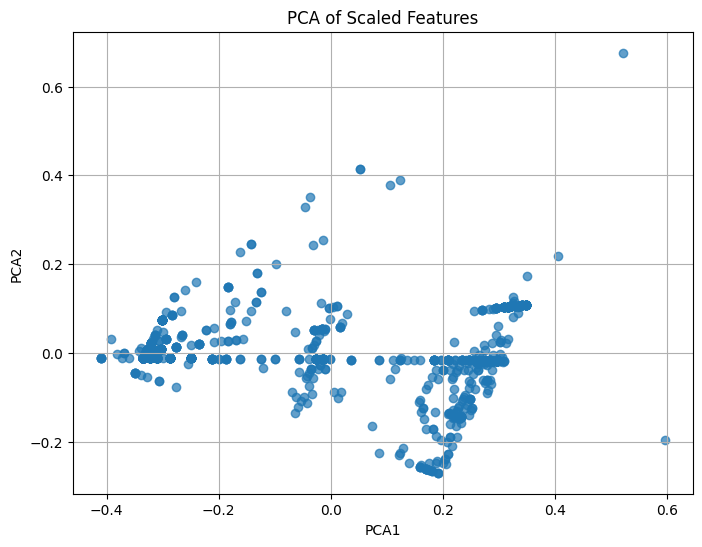

                  Date Quarter Department Targeted Productivity  Overtime  \
0  2015-01-01 00:00:00      Q1     Sewing                   0.8  0.273148   
1  2015-01-01 00:00:00      Q1  Finishing                  0.75  0.037037   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8  0.141204   
3  2015-01-01 00:00:00      Q1     Sewing                   0.8  0.141204   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8  0.074074   

   No. of Workers Actual Productivity      PCA1      PCA2  
0        0.655172            0.940725  0.296116 -0.017509  
1        0.068966              0.8865 -0.335826 -0.011539  
2        0.327586             0.80057 -0.057028 -0.014173  
3        0.327586             0.80057 -0.057028 -0.014173  
4        0.620690                 NaN  0.188137 -0.188272  


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('C:/Users/Rahul/Downloads/AssignmentData.xlsx')

# Identify non-numeric entries in 'Overtime' and 'No. of Workers' columns
non_numeric_overtime_entries = df[~df['Overtime'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]
non_numeric_workers_entries = df[~df['No. of Workers'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]

# Handle non-numeric values (remove or impute)
df['Overtime'] = pd.to_numeric(df['Overtime'], errors='coerce')
df['No. of Workers'] = pd.to_numeric(df['No. of Workers'], errors='coerce')

# Drop rows with NaN values (resulting from non-numeric entries)
df.dropna(subset=['Overtime', 'No. of Workers'], inplace=True)

# Feature Scaling using Min-Max Scaling
scaler = MinMaxScaler()
df[['Overtime', 'No. of Workers']] = scaler.fit_transform(df[['Overtime', 'No. of Workers']])

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df[['Overtime', 'No. of Workers']])

# Add PCA-transformed features to the dataframe
df['PCA1'] = pca_transformed[:, 0]
df['PCA2'] = pca_transformed[:, 1]

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.7)
plt.title('PCA of Scaled Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

# Display the first few rows of the updated dataframe
print(df.head())


Anomaly Detection Model

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

In [16]:
# Load the dataset
df = pd.read_excel('C:/Users/Rahul/Downloads/AssignmentData.xlsx')

# Dropping non-numeric and irrelevant columns for anomaly detection
df = df.drop(['Date', 'Quarter', 'Department'], axis=1)

# Handle non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Feature scaling using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Iso'] = iso_forest.fit_predict(df_scaled)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['Anomaly_LOF'] = lof.fit_predict(df_scaled)

In [18]:
# Convert model predictions (-1 for outliers) to binary labels
df['Anomaly_Iso'] = np.where(df['Anomaly_Iso'] == -1, 1, 0)
df['Anomaly_LOF'] = np.where(df['Anomaly_LOF'] == -1, 1, 0)

# Analyze the results
print("Anomalies detected by Isolation Forest:", df['Anomaly_Iso'].sum())
print("Anomalies detected by Local Outlier Factor:", df['Anomaly_LOF'].sum())

Anomalies detected by Isolation Forest: 59
Anomalies detected by Local Outlier Factor: 59


In [19]:
# Display a few rows of the dataset with the anomaly labels
print(df.head())

# Compare the overlap between the two methods
df['Anomaly_Agreement'] = df['Anomaly_Iso'] == df['Anomaly_LOF']
agreement_rate = df['Anomaly_Agreement'].mean()
print(f"Agreement rate between Isolation Forest and LOF: {agreement_rate:.2f}")

   Targeted Productivity  Overtime  No. of Workers  Actual Productivity  \
0                   0.80    7080.0            59.0             0.940725   
1                   0.75     960.0             8.0             0.886500   
2                   0.80    3660.0            30.5             0.800570   
3                   0.80    3660.0            30.5             0.800570   
5                   0.80    6720.0            56.0             0.800125   

   Anomaly_Iso  Anomaly_LOF  
0            0            0  
1            0            0  
2            0            1  
3            0            1  
5            0            0  
Agreement rate between Isolation Forest and LOF: 0.91


Visualizing Anomalies

In [21]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA to reduce the dataset to 2 principal components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

In [22]:
# Add PCA components to the dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Iso'] = iso_forest.fit_predict(df_scaled)
df['Anomaly_Iso'] = np.where(df['Anomaly_Iso'] == -1, 1, 0)

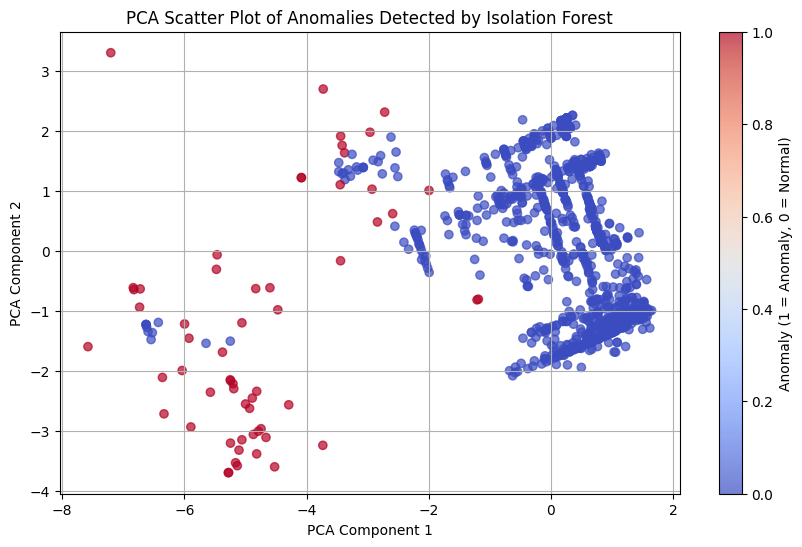

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Anomaly_Iso'], cmap='coolwarm', alpha=0.7)
plt.title('PCA Scatter Plot of Anomalies Detected by Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Anomaly (1 = Anomaly, 0 = Normal)')
plt.grid(True)
plt.show()

In [26]:

def classify_fraudulent_transactions(new_data, trained_model):
    # Preprocess the new data (assumes no non-numeric columns)
    scaler = StandardScaler()
    new_data_scaled = scaler.fit_transform(new_data)

    # Predict anomalies using the trained model
    predictions = trained_model.predict(new_data_scaled)
    anomalies = new_data[predictions == -1]  # IsolationForest returns -1 for anomalies

    return anomalies

In [27]:
import streamlit as st

def classify_fraudulent_transactions(new_data, trained_model):
    scaler = StandardScaler()
    new_data_scaled = scaler.fit_transform(new_data)
    predictions = trained_model.predict(new_data_scaled)
    anomalies = new_data[predictions == -1]  # IsolationForest returns -1 for anomalies
    return anomalies

In [28]:
# Streamlit App
st.title("Credit Card Fraud Detection App")

st.write("Upload a new dataset of credit card transactions to detect fraudulent activities.")

# File upload
uploaded_file = st.file_uploader("Data", type=["xlsx"])

2024-09-01 23:56:04.695 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.100 
  command:

    streamlit run C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-01 23:56:05.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:56:05.107 Thre

In [29]:
if uploaded_file is not None:
    # Load the new data
    creditcard_test_df = pd.read_excel(uploaded_file, sheet_name="creditcard_test")
    st.write("Uploaded Data Preview:")
    st.dataframe(creditcard_test_df.head())
    
    scaler = StandardScaler()
    creditcard_test_scaled = scaler.fit_transform(creditcard_test_df)
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(creditcard_test_scaled)
    
    # Classify fraudulent transactions
    fraudulent_transactions = classify_fraudulent_transactions(creditcard_test_df, model)
    st.write(f"Number of fraudulent transactions detected: {len(fraudulent_transactions)}")
    st.dataframe(fraudulent_transactions)

    # Visualize the results using PCA
    st.write("PCA Visualization of Detected Anomalies:")
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(creditcard_test_scaled)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_components[:, 0], pca_components[:, 1], c=model.predict(creditcard_test_scaled), cmap='coolwarm', alpha=0.7)
    plt.title('PCA Scatter Plot of Detected Anomalies')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Anomaly (1 = Anomaly, 0 = Normal)')
    plt.grid(True)
    st.pyplot(plt)

# Footer
st.write("Developed using Streamlit")
    

2024-09-01 23:57:10.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:57:10.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:57:10.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-01 23:57:10.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
